In [2]:
# pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #Focused Algorithm
import statsmodels.api as sm
import statsmodels.formula.api as SM
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv('forbes_2640_billionaires.csv')
df.head()

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


In [5]:
df.tail()

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
2635,2540,Yu Rong,yu-rong,1.0,51.0,6,China,Health clinics,Healthcare,51.0,...,"Shanghai, China",China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2636,2540,"Richard Yuengling, Jr.",richard-yuengling-jr,1.0,80.0,8,United States,Beer,Food & Beverage,80.0,...,"Pottsville, Pennsylvania",United States,Divorced,4.0,"Drop Out, Lycoming College",0.0,0.0,0.0,1.0,0
2637,2540,Zhang Gongyun,zhang-gongyun,1.0,60.0,6,China,Tyre manufacturing machinery,Manufacturing,60.0,...,"Gaomi, China",China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2638,2540,Zhang Guiping & family,zhang-guiping,1.0,71.0,8,China,Real estate,Real Estate,72.0,...,"Nanjing, China",China,Married,1.0,"Bachelor of Arts/Science, South East University",1.0,0.0,0.0,0.0,1
2639,2540,Inigo Zobel,inigo-zobel,1.0,66.0,7,Philippines,Diversified,Diversified,66.0,...,"Makati, Philippines",Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                2640 non-null   int64  
 1   name                2640 non-null   object 
 2   forbes_id           2640 non-null   object 
 3   net_worth           2640 non-null   float64
 4   age                 2575 non-null   float64
 5   age_range           2640 non-null   int64  
 6   country             2640 non-null   object 
 7   source              2640 non-null   object 
 8   industry            2640 non-null   object 
 9   Age                 2555 non-null   float64
 10  Source of Wealth    2639 non-null   object 
 11  Self-Made Score     558 non-null    float64
 12  Philanthropy Score  411 non-null    float64
 13  Residence           2581 non-null   object 
 14  Citizenship         2629 non-null   object 
 15  Marital Status      2089 non-null   object 
 16  Childr

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2640.0,1289.159091,739.693726,1.0,659.0,1312.0,1905.0,2540.0
net_worth,2640.0,4.623788,9.834241,1.0,1.5,2.3,4.2,211.0
age,2575.0,65.138641,13.258934,18.0,56.0,65.0,75.0,101.0
age_range,2640.0,6.782955,1.722357,0.0,6.0,7.0,8.0,11.0
Age,2555.0,65.457143,13.245204,19.0,56.0,66.0,75.0,101.0
Self-Made Score,558.0,6.586022,2.644520,1.0,5.0,8.0,8.0,10.0
Philanthropy Score,411.0,1.927007,1.021489,1.0,1.0,2.0,2.0,5.0
Children,1598.0,2.969337,1.675171,1.0,2.0,3.0,4.0,23.0
Bachelor,1416.0,0.686441,0.464103,0.0,0.0,1.0,1.0,1.0
Master,1416.0,0.370056,0.482990,0.0,0.0,0.0,1.0,1.0


In [8]:
df.isnull().sum()

rank                     0
name                     0
forbes_id                0
net_worth                0
age                     65
age_range                0
country                  0
source                   0
industry                 0
Age                     85
Source of Wealth         1
Self-Made Score       2082
Philanthropy Score    2229
Residence               59
Citizenship             11
Marital Status         551
Children              1042
Education             1225
Bachelor              1224
Master                1224
Doctorate             1224
Drop Out              1224
Self Made                0
dtype: int64

In [9]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_columns = df.select_dtypes(include=['object']).columns

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])



In [10]:
df

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,Yu Rong,yu-rong,1.0,51.0,6,China,Health clinics,Healthcare,51.0,...,"Shanghai, China",China,Married,NaN,"Diploma, High School",NaN,NaN,NaN,NaN,1
2636,2540,"Richard Yuengling, Jr.",richard-yuengling-jr,1.0,80.0,8,United States,Beer,Food & Beverage,80.0,...,"Pottsville, Pennsylvania",United States,Divorced,4.0,"Drop Out, Lycoming College",0.0,0.0,0.0,1.0,0
2637,2540,Zhang Gongyun,zhang-gongyun,1.0,60.0,6,China,Tyre manufacturing machinery,Manufacturing,60.0,...,"Gaomi, China",China,Married,NaN,"Diploma, High School",NaN,NaN,NaN,NaN,1
2638,2540,Zhang Guiping & family,zhang-guiping,1.0,71.0,8,China,Real estate,Real Estate,72.0,...,"Nanjing, China",China,Married,1.0,"Bachelor of Arts/Science, South East University",1.0,0.0,0.0,0.0,1


In [11]:
df.drop('name', axis=1, inplace=True)
df.drop('forbes_id', axis=1, inplace=True)
df.drop('Age', axis=1, inplace=True)
df.drop('Residence', axis=1, inplace=True)
df.drop('Citizenship', axis=1, inplace=True)

df.drop('Source of Wealth', axis=1, inplace=True)
df.drop('Education', axis=1, inplace=True)
df.drop('source', axis=1, inplace=True)
df.drop('industry', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.drop('Marital Status', axis=1, inplace=True)
df.drop('rank', axis=1, inplace=True)
df.drop('Children', axis=1, inplace=True)

In [12]:
df.head()

,net_worth,age,age_range,Self-Made Score,Philanthropy Score,Bachelor,Master,Doctorate,Drop Out,Self Made
0,211.0,74.0,8,NaN,NaN,1.0,0.0,0.0,0.0,0
1,180.0,51.0,6,8.0,1.0,1.0,0.0,0.0,0.0,1
2,114.0,59.0,6,8.0,2.0,1.0,0.0,0.0,0.0,1
3,107.0,78.0,8,9.0,1.0,0.0,0.0,0.0,1.0,1
4,106.0,92.0,10,8.0,5.0,1.0,1.0,0.0,0.0,1


net_worth


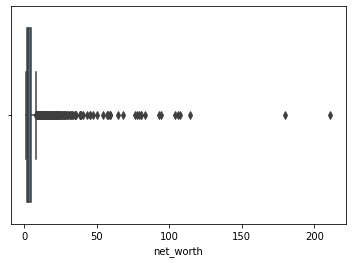

age


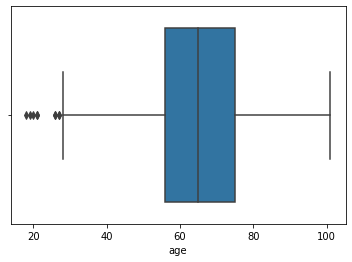

age_range


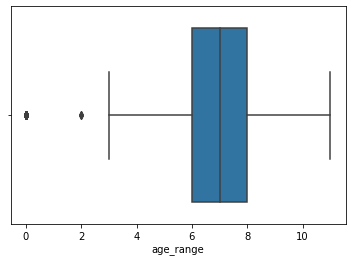

Self-Made Score


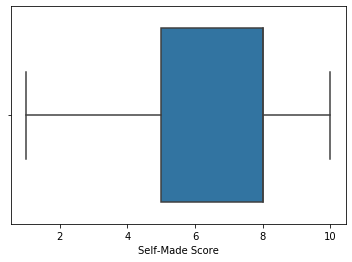

Philanthropy Score


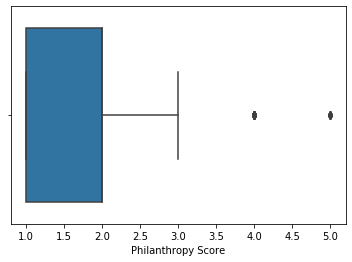

Bachelor


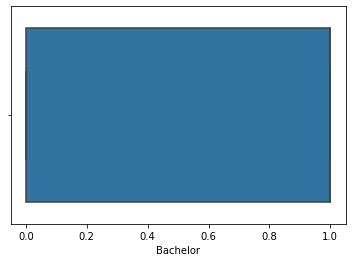

Master


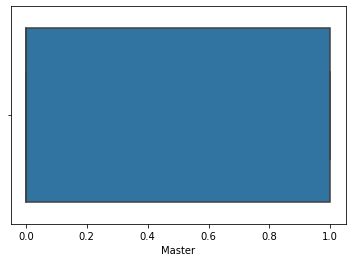

Doctorate


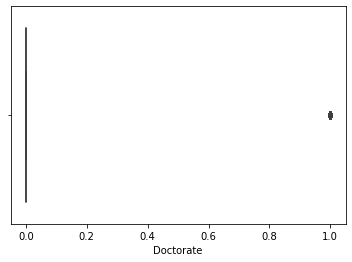

Drop Out


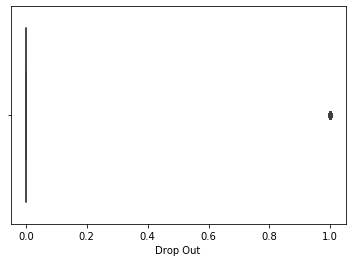

In [13]:
for i in df.iloc[:,:-1].columns:
    if df[i].dtype != 'object':
        print(i)
        sns.boxplot(df[i])
        plt.show()

net_worth


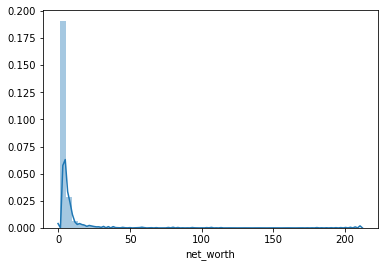

age


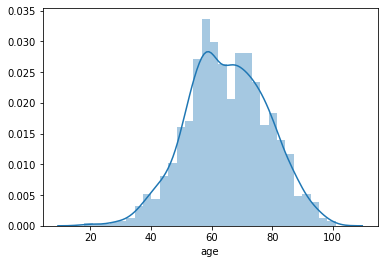

age_range


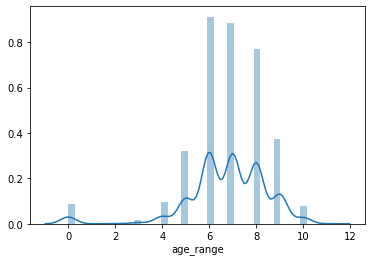

Self-Made Score


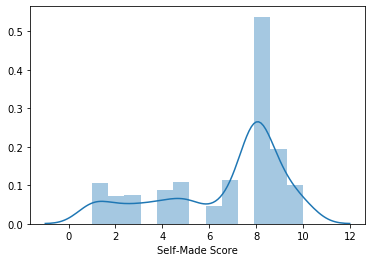

Philanthropy Score


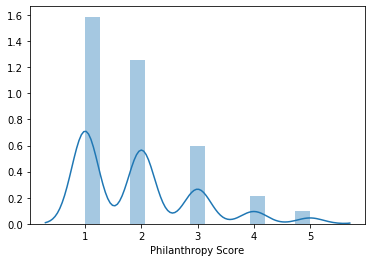

Bachelor


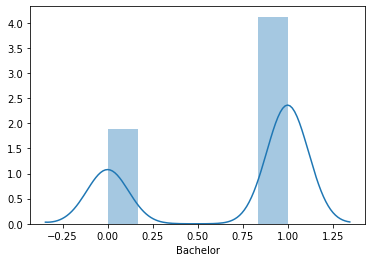

Master


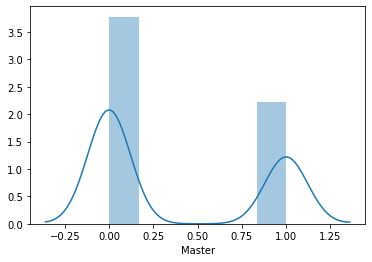

In [15]:
for i in df.iloc[:,:-3].columns:
    if df[i].dtype != 'object':
        print(i)
        sns.distplot(df[i])
        plt.show()

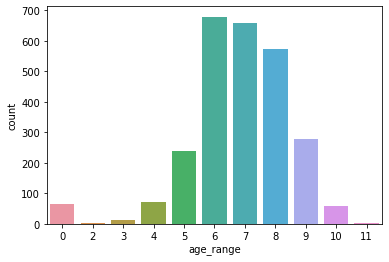

In [18]:
sns.countplot(df['age_range'])
plt.show()

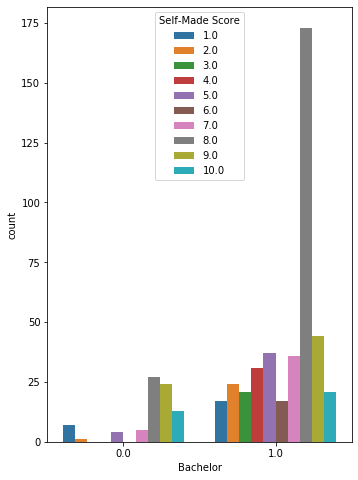

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.countplot(df['Bachelor'], hue=df['Self-Made Score'])
plt.show()

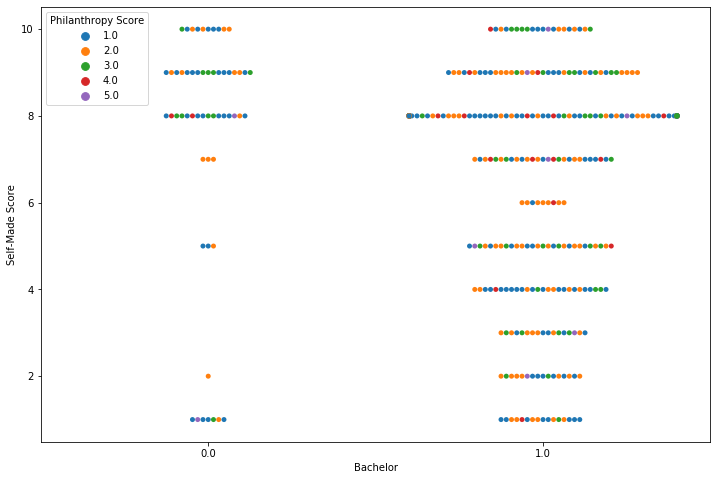

In [23]:
plt.figure(figsize=(12,8))
sns.swarmplot(df['Bachelor'], df['Self-Made Score'], hue=df['Philanthropy Score'])
plt.show()

In [24]:
def outlier_to_median(dataf, column_name):

    Q1 = dataf[column_name].quantile(0.25)
    Q3 = dataf[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataf[(dataf[column_name] < lower_bound) | (dataf[column_name] > upper_bound)]

    median = dataf[(dataf[column_name] >= lower_bound) & (dataf[column_name] <= upper_bound)][column_name].median()

    dataf.loc[(dataf[column_name] < lower_bound) | (dataf[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=dataf)
    plt.show()

Distribution after outlier removal


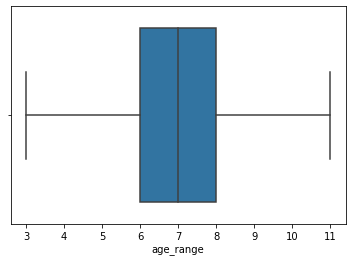

Distribution after outlier removal


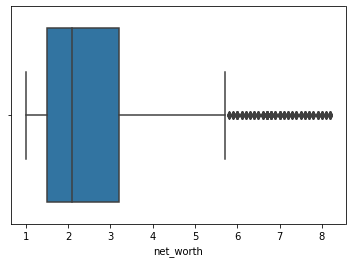

Distribution after outlier removal


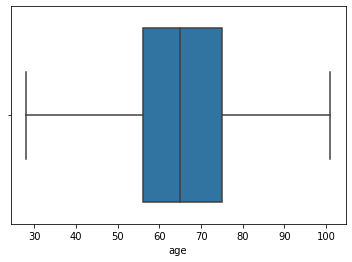

Distribution after outlier removal


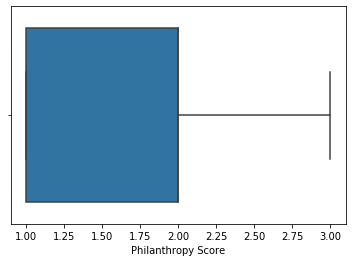

Distribution after outlier removal


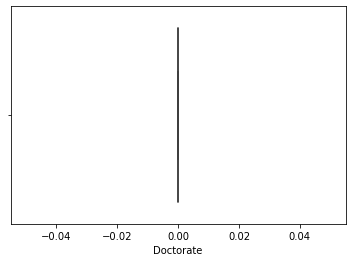

Distribution after outlier removal


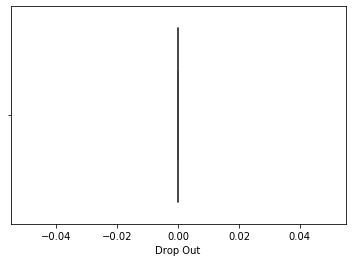

In [25]:
outlier_to_median(df, 'age_range')
outlier_to_median(df, 'net_worth')
outlier_to_median(df, 'age')
outlier_to_median(df, 'Philanthropy Score')
outlier_to_median(df, 'Doctorate')
outlier_to_median(df, 'Drop Out')

In [26]:
df.isnull().sum()

net_worth                0
age                     65
age_range                0
Self-Made Score       2082
Philanthropy Score    2229
Bachelor              1224
Master                1224
Doctorate             1224
Drop Out              1224
Self Made                0
dtype: int64

In [27]:
numerical_imputer = SimpleImputer(strategy='median')
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df

,net_worth,age,age_range,Self-Made Score,Philanthropy Score,Bachelor,Master,Doctorate,Drop Out,Self Made
0,2.1,74.0,8.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0
1,2.1,51.0,6.0,8.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2.1,59.0,6.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0
3,2.1,78.0,8.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2.1,92.0,10.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2635,1.0,51.0,6.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0
2636,1.0,80.0,8.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
2637,1.0,60.0,6.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0
2638,1.0,71.0,8.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0


In [28]:
df.isna().sum()

net_worth             0
age                   0
age_range             0
Self-Made Score       0
Philanthropy Score    0
Bachelor              0
Master                0
Doctorate             0
Drop Out              0
Self Made             0
dtype: int64

In [29]:
df.head()

,net_worth,age,age_range,Self-Made Score,Philanthropy Score,Bachelor,Master,Doctorate,Drop Out,Self Made
0,2.1,74.0,8.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0
1,2.1,51.0,6.0,8.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2.1,59.0,6.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0
3,2.1,78.0,8.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2.1,92.0,10.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0


In [30]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula='y~x', data=x_vars).fit().rsquared
        vif = round(1/(1-rsq), 2)
        print(xvar_names[i], ' VIF = ',vif)

In [31]:
vif_cal(df)

net_worth  VIF =  1.04
age  VIF =  15.36
age_range  VIF =  15.36
Self-Made Score  VIF =  1.21
Philanthropy Score  VIF =  1.04
Bachelor  VIF =  1.11
Master  VIF =  1.11
Doctorate  VIF =  nan
Drop Out  VIF =  nan
Self Made  VIF =  1.18


In [32]:
df.drop('age_range', axis=1, inplace=True)

In [33]:
vif_cal(df)

net_worth  VIF =  1.04
age  VIF =  1.02
Self-Made Score  VIF =  1.21
Philanthropy Score  VIF =  1.04
Bachelor  VIF =  1.11
Master  VIF =  1.11
Doctorate  VIF =  nan
Drop Out  VIF =  nan
Self Made  VIF =  1.18


In [34]:
X = df.drop(['Self Made'], axis=1)
y = df[['Self Made']]

In [35]:
X.head()

,net_worth,age,Self-Made Score,Philanthropy Score,Bachelor,Master,Doctorate,Drop Out
0,2.1,74.0,8.0,2.0,1.0,0.0,0.0,0.0
1,2.1,51.0,8.0,1.0,1.0,0.0,0.0,0.0
2,2.1,59.0,8.0,2.0,1.0,0.0,0.0,0.0
3,2.1,78.0,9.0,1.0,0.0,0.0,0.0,0.0
4,2.1,92.0,8.0,2.0,1.0,1.0,0.0,0.0


In [36]:
y.head()

,Self Made
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [37]:
for i in X.columns:
    print(df[i].value_counts())
    print(df[i].min())
    print(df[i].max())
    print('*********************************************************')

2.1    330
1.2    146
1.1    135
1.3    126
1.5    115
      ... 
7.8      6
8.1      5
7.3      5
5.9      5
5.8      3
Name: net_worth, Length: 73, dtype: int64
1.0
8.2
*********************************************************
65.0     143
60.0      87
58.0      83
59.0      82
57.0      75
        ... 
32.0       2
101.0      1
29.0       1
31.0       1
28.0       1
Name: age, Length: 73, dtype: int64
28.0
101.0
*********************************************************
8.0     2290
9.0       75
7.0       44
5.0       42
1.0       41
10.0      39
4.0       34
3.0       29
2.0       28
6.0       18
Name: Self-Made Score, dtype: int64
1.0
10.0
*********************************************************
2.0    2401
1.0     174
3.0      65
Name: Philanthropy Score, dtype: int64
1.0
3.0
*********************************************************
1.0    2196
0.0     444
Name: Bachelor, dtype: int64
0.0
1.0
*********************************************************
0.0    2116
1.0     524
Name: 

In [38]:
df['net_worth'].max()

8.2

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [41]:
#X = df.drop(['Self Made'], axis=1)
#y = df[['Self Made']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2899, 8)
(2899, 1)
(725, 8)
(725, 1)


# Logistic Regression

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_train_pred = model.predict(X_train)

In [52]:
y_train_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [53]:
metrics.accuracy_score(y_train, y_train_pred)

0.6081407381855812

In [54]:
y_test_pred = model.predict(X_test)
y_test_pred

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1.

In [55]:
metrics.accuracy_score(y_test, y_test_pred)

0.6262068965517241

In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59       356
         1.0       0.62      0.71      0.66       369

    accuracy                           0.63       725
   macro avg       0.63      0.62      0.62       725
weighted avg       0.63      0.63      0.62       725



# Decesion Tree

In [57]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.736551724137931
Confusion Matrix:
 [[276  80]
 [111 258]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       356
         1.0       0.76      0.70      0.73       369

    accuracy                           0.74       725
   macro avg       0.74      0.74      0.74       725
weighted avg       0.74      0.74      0.74       725



# Random Forest

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.7627586206896552
Confusion Matrix:
 [[270  86]
 [ 86 283]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       356
         1.0       0.77      0.77      0.77       369

    accuracy                           0.76       725
   macro avg       0.76      0.76      0.76       725
weighted avg       0.76      0.76      0.76       725



In [61]:
df.shape

(2640, 9)

# GridSearchCV

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_classifier_gs = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier_gs, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
0.7554368411649098


# RandomizedSearchCV

In [63]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model and Random Search
rf_classifier_rs = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier_rs, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the Random Search to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_
print(best_params)
print(best_score)

{'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 20}
0.7495700077422428


In [64]:
df

,net_worth,age,Self-Made Score,Philanthropy Score,Bachelor,Master,Doctorate,Drop Out,Self Made
0,2.1,74.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0
1,2.1,51.0,8.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2.1,59.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0
3,2.1,78.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2.1,92.0,8.0,2.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2635,1.0,51.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0
2636,1.0,80.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
2637,1.0,60.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0
2638,1.0,71.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0


In [65]:
grid_search.predict([[2.1,51.0,8.0,1.0,1.0,0.0,0.0,0.0]])

array([1.])

In [66]:
grid_search.predict([[1.0,80.0,5.0,2.0,0.0,0.0,0.0,0.0]])

array([0.])

In [ ]:
import pickle
pickle.dump(rf_classifier,open('Forbs.pkl', 'wb'))